<a href="https://colab.research.google.com/github/poorvis885/Clap-Detection/blob/main/MinorProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,pH,Turbidity
0,6.6,0
1,6.6,1
2,8.5,1
3,9.5,1
4,6.6,0


Model Accuracy: 0.9952830188679245
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.99      1.00      1.00       100
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00        60

    accuracy                           1.00       212
   macro avg       0.75      0.75      0.75       212
weighted avg       0.99      1.00      0.99       212



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


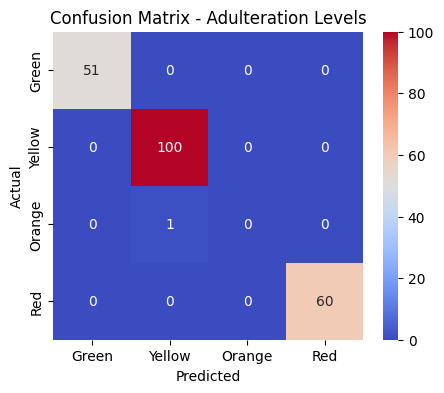

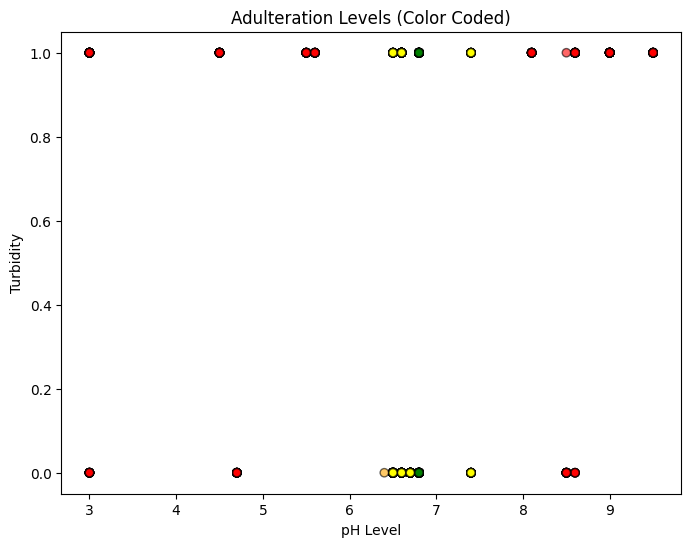

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/milknew.csv')

# Display first few rows
display(df.head())

# Check for missing values
df.dropna(inplace=True)

# Add 'Adulterated' column based on pH and Turbidity thresholds
def classify_adulteration(row):
    if row['pH'] < 6.0 or row['pH'] > 8.0 or row['Turbidity'] > 80:
        return 3  # Highly Adulterated (Red)
    elif row['pH'] < 6.5 or row['pH'] > 7.5 or row['Turbidity'] > 60:
        return 2  # Moderately Adulterated (Orange)
    elif row['pH'] < 6.8 or row['pH'] > 7.2 or row['Turbidity'] > 50:
        return 1  # Slightly Adulterated (Yellow)
    else:
        return 0  # Not Adulterated (Green)

df['Adulterated'] = df.apply(classify_adulteration, axis=1)

# Features & Target Selection
X = df[['pH', 'Turbidity']]
y = df['Adulterated']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', xticklabels=['Green', 'Yellow', 'Orange', 'Red'], yticklabels=['Green', 'Yellow', 'Orange', 'Red'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Adulteration Levels')
plt.show()

# Scatter plot with color coding
plt.figure(figsize=(8,6))
colors = {0: 'green', 1: 'yellow', 2: 'orange', 3: 'red'}
plt.scatter(df['pH'], df['Turbidity'], c=df['Adulterated'].map(colors), alpha=0.6, edgecolors='k')
plt.xlabel('pH Level')
plt.ylabel('Turbidity')
plt.title('Adulteration Levels (Color Coded)')
plt.show()

,pH,Turbidity
0,6.6,0
1,6.6,1
2,8.5,1
3,9.5,1
4,6.6,0


Model Accuracy: 0.9952830188679245
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.99      1.00      1.00       100
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00        60

    accuracy                           1.00       212
   macro avg       0.75      0.75      0.75       212
weighted avg       0.99      1.00      0.99       212



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


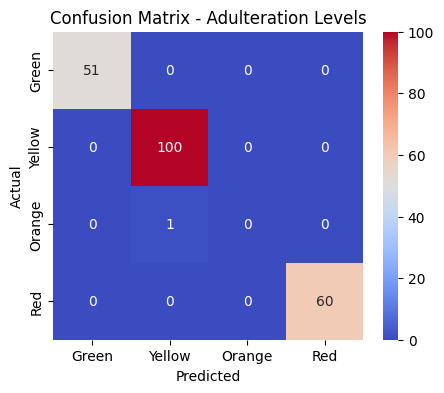

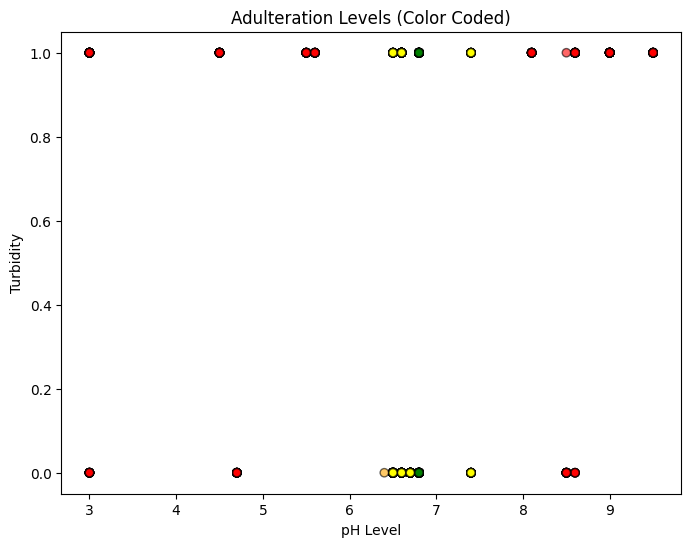

SerialException: [Errno 2] could not open port /dev/ttyUSB0: [Errno 2] No such file or directory: '/dev/ttyUSB0'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pyserial
import serial


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/milknew.csv')

# Display first few rows
display(df.head())

# Check for missing values
df.dropna(inplace=True)

# Add 'Adulterated' column based on pH and Turbidity thresholds
def classify_adulteration(row):
    if row['pH'] < 6.0 or row['pH'] > 8.0 or row['Turbidity'] > 80:
        return 3  # Highly Adulterated (Red)
    elif row['pH'] < 6.5 or row['pH'] > 7.5 or row['Turbidity'] > 60:
        return 2  # Moderately Adulterated (Orange)
    elif row['pH'] < 6.8 or row['pH'] > 7.2 or row['Turbidity'] > 50:
        return 1  # Slightly Adulterated (Yellow)
    else:
        return 0  # Not Adulterated (Green)

df['Adulterated'] = df.apply(classify_adulteration, axis=1)

# Features & Target Selection
X = df[['pH', 'Turbidity']]
y = df['Adulterated']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', xticklabels=['Green', 'Yellow', 'Orange', 'Red'], yticklabels=['Green', 'Yellow', 'Orange', 'Red'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Adulteration Levels')
plt.show()

# Scatter plot with color coding
plt.figure(figsize=(8,6))
colors = {0: 'green', 1: 'yellow', 2: 'orange', 3: 'red'}
plt.scatter(df['pH'], df['Turbidity'], c=df['Adulterated'].map(colors), alpha=0.6, edgecolors='k')
plt.xlabel('pH Level')
plt.ylabel('Turbidity')
plt.title('Adulteration Levels (Color Coded)')
plt.show()

# Read real-time sensor data from Arduino
ser = serial.Serial('/dev/ttyUSB0', 9600)  # Update with your port

def get_sensor_data():
    line = ser.readline().decode().strip()
    values = line.split(',')
    if len(values) == 2:
        try:
            pH_value = float(values[0])
            turbidity_value = float(values[1])
            return pH_value, turbidity_value
        except ValueError:
            return None, None
    return None, None

while True:
    pH, turbidity = get_sensor_data()
    if pH is not None and turbidity is not None:
        input_data = scaler.transform([[pH, turbidity]])
        prediction = model.predict(input_data)[0]
        color_map = {0: 'Green', 1: 'Yellow', 2: 'Orange', 3: 'Red'}
        print(f"pH: {pH}, Turbidity: {turbidity}, Adulteration Level: {color_map[prediction]}")
